In [1]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split, cross_val_score
import warnings
warnings.filterwarnings("ignore")

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline  

In [2]:
data = pd.read_csv('data/SMSSpamCollection.tsv', delimiter="\t")
data.head()

,status,body
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


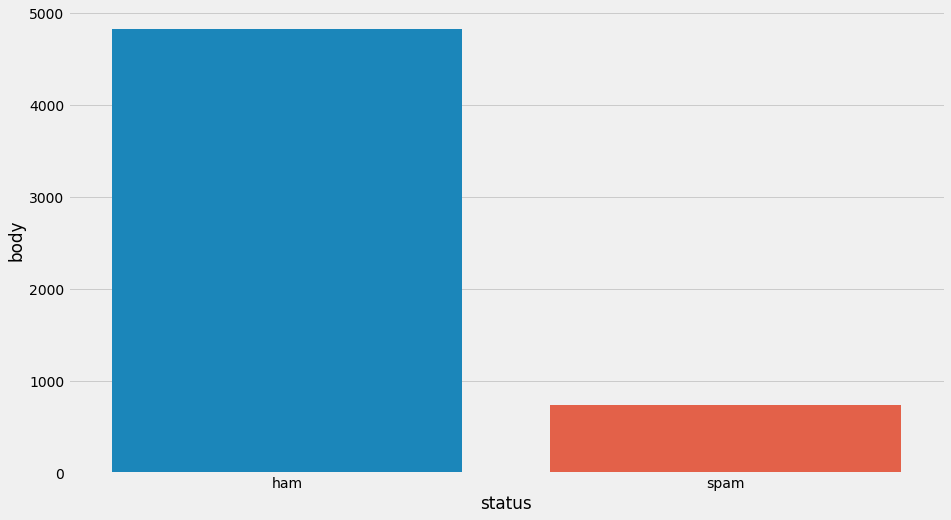

In [3]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(14,8))

df_2 = data.groupby('status').count()
df_2.reset_index(inplace=True)
sns.barplot(x='status', y='body', data=df_2);

In [4]:
train_x, test_x, train_y, test_y = train_test_split(data["body"], data["status"])

In [5]:
train_y.head()

585     ham
5247    ham
613     ham
4415    ham
91      ham
Name: status, dtype: object

In [6]:
train_x.head()

585     So how's scotland. Hope you are not over showi...
5247    Gud ni8 dear..slp well..take care..swt dreams....
613                                I have many dependents
4415    How stupid to say that i challenge god.You don...
91      Sorry to be a pain. Is it ok if we meet anothe...
Name: body, dtype: object

In [7]:
vectorizer = TfidfVectorizer(stop_words='english')
tfidf_train_x = vectorizer.fit_transform(train_x)

In [8]:
index_value={i[1]:i[0] for i in vectorizer.vocabulary_.items()}
fully_indexed = []
for row in tfidf_train_x:
    fully_indexed.append({index_value[column]:value for (column,value) in zip(row.indices,row.data)})

In [9]:
classifier = GaussianNB()
classifier.fit(tfidf_train_x.toarray(), train_y)

GaussianNB(priors=None)

In [10]:
tfidf_test_x = vectorizer.transform(test_x)
print(tfidf_test_x.shape)
scores = cross_val_score(classifier, tfidf_test_x.toarray(), test_y, cv=5)
acc = scores.mean()
print("Accuracy: %0.2f percent" % (acc *100))

(1393, 7172)
Accuracy: 88.44 percent


In [11]:
mess = ['Please gas up my car', "You won the lottery, claim it now!!!"]
output = classifier.predict(vectorizer.transform(mess).toarray())

for i ,m in enumerate(mess):
    print(m, ' == ', output[i])

Please gas up my car  ==  ham
You won the lottery, claim it now!!!  ==  spam
